In [128]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
tickers= ["AAPL", "AMZN", "NOK", "XOM"]
start_date="2011-01-01"
end_date="2021-12-31"
data = yf.download(tickers ,start=start_date, end=end_date )
finance=data["Close"]
finance.index=finance.index.strftime('%Y-%m-%d')
print(finance)
finance.to_csv('finance.csv')
#finance.to_excel('finance.xlsx', engine='openpyxl')

[*********************100%***********************]  4 of 4 completed

Ticker            AAPL        AMZN    NOK        XOM
Date                                                
2011-01-03   11.770357    9.211000  10.66  74.550003
2011-01-04   11.831786    9.250500  10.86  74.900002
2011-01-05   11.928571    9.371000  10.66  74.699997
2011-01-06   11.918929    9.293000  10.59  75.180000
2011-01-07   12.004286    9.274500  10.51  75.589996
...                ...         ...    ...        ...
2021-12-23  176.279999  171.068497   6.19  61.020000
2021-12-27  180.330002  169.669495   6.34  61.889999
2021-12-28  179.289993  170.660995   6.30  61.689999
2021-12-29  179.380005  169.201004   6.29  61.150002
2021-12-30  178.199997  168.644501   6.26  60.790001

[2768 rows x 4 columns]


In [152]:
FINANCE= pd.read_csv('finance.csv', delimiter= ',')
FINANCE['Date']=  pd.to_datetime(FINANCE['Date'], format = '%Y-%m-%d')
FINANCE.set_index('Date', inplace=True)
FINANCE.index
apl=FINANCE.AAPL
print(apl.max())
amzn=FINANCE.AMZN
print(amzn.max())
nok=FINANCE.NOK
print(nok.max())
exxon=FINANCE.XOM
print(exxon.max())

180.3300018310547
186.57049560546875
11.729999542236328
104.37999725341795


In [161]:
def graph_time_series(axes, x, y, color, xlabel, ylabel ):
    """
    This function plots a time series, taking the axes, x-axis values, y-axis values, color, and axis labels as inputs.

    Arguments  :
        axes   : The axes being worked on
        x      : Dates for the x-axis (usually the index)
        y      : Values for the y-axis
        color  : Color of the axes
        xlabel : Label for the x-axis
        ylabel : Label for the y-axis
    """
    
    axes.plot(x, y, color = color)

    #max_value==y.max() , maxdate==x[y.idxmax()]
    #axes.annotate('Punto Máximo', xy=(max_date,max_value))
    axes.set_xlabel(xlabel)
    
    axes.set_ylabel(ylabel, color = color)
    
    axes.tick_params(axis = 'y', colors = color)   

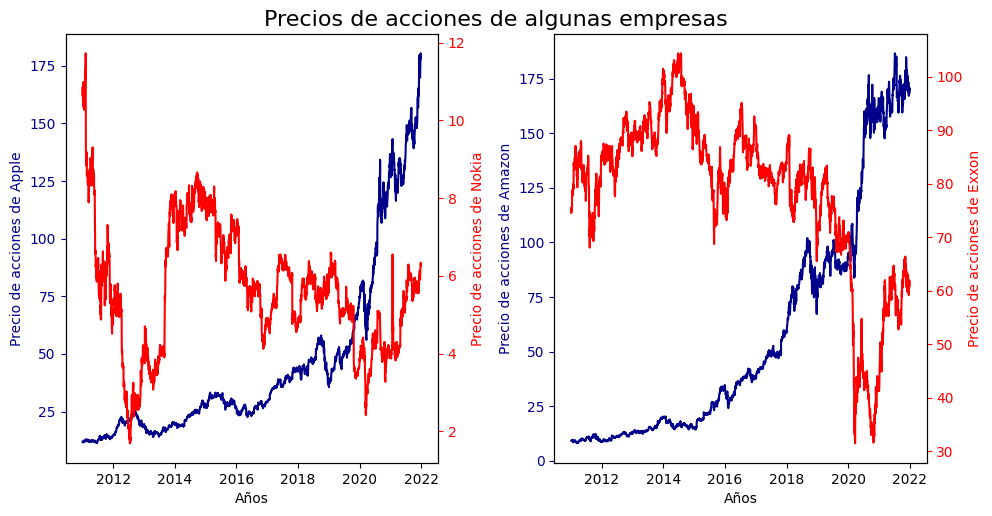

In [162]:
plt.style.use('default')

fig, axs = plt.subplots(1,2, figsize= (10,5))

graph_time_series(axs[0], FINANCE.index,FINANCE.AAPL, 
                        "darkblue", 'Años','Precio de acciones de Apple')
ax1 = axs[0].twinx()
graph_time_series(ax1, FINANCE.index,FINANCE.NOK, 
                        "red", 'Años','Precio de acciones de Nokia')

graph_time_series(axs[1], FINANCE.index,FINANCE.AMZN, 
                        "darkblue", 'Años','Precio de acciones de Amazon')
ax2 = axs[1].twinx()
graph_time_series(ax2, FINANCE.index,FINANCE.XOM, 
                        "red", 'Años','Precio de acciones de Exxon')
fig.tight_layout(pad=1.0)
fig.suptitle('Precios de acciones de algunas empresas', y=1.02 , fontsize=16)
plt.savefig("Acciones de empresas.png", bbox_inches='tight', dpi=300)
plt.show()